# EDA 2 - Mandatory Project
### Pavan Kumar G  
### DS 16 Batch




# Introduction

#### Diabetes is a serious disease affecting millions of people across the entire world. Thus, correct and timely prediction of this disease is very important due to the complications it can have in the case of other life-threatening diseases. The high blood sugar level is the primary cause mostly seen in this disease.

#### What is diabetes?
#### Diabetes is a condition in which the body can't make enough insulin, or can't use insulin normally. Insulin is a hormone. It helps sugar (glucose) in the blood get into cells of the body to be used as fuel. When glucose can’t enter the cells, it builds up in the blood. This leads to high blood sugar (hyperglycemia).

#### High blood sugar can cause problems all over the body. It can damage blood vessels and nerves. It can harm the eyes, kidneys, and heart. In early pregnancy, high blood sugar can lead to birth defects in a growing baby.

#### There are 3 types of diabetes:

#### Type 1 diabetes. Type 1 diabetes is an autoimmune disorder. The body's immune system damages the cells in the pancreas that make insulin.

#### Type 2 diabetes. This is when the body can’t make enough insulin or use it normally. It’s not an autoimmune disease.

#### Gestational diabetes. This is a condition in which the blood glucose level goes up and other diabetic symptoms appear during pregnancy in a woman who has not been diagnosed with diabetes before. It happens in about 3 in 100 to 9 in 100 pregnant women.


## Aim
#### The objective of this project is to construct a prediction model for predicting diabetes and type of diabetes.


### Dataset Used:
#### The dataset used for this project is Pima Indians Diabetes Dataset from Kaggle. This original dataset has been provided by the National Institute of Diabetes and Digestive and Kidney Diseases. Both dataset and code for this project are available on my GitHub repository. This dataset is used to predict whether a patient is likely to get diabetes based on the input parameters like Age, Glucose, Blood pressure, Insulin, BMI, etc. Each row in the data provides relevant information about the patient.


### Features of the dataset:


#### The dataset contains 767 individuals data with 9 features set. The detailed description of all the features are as follows:

##### Pregnancies: indicates the number of pregnancies

##### Glucose: indicates the plasma glucose concentration

##### Blood Pressure: indicates diastolic blood pressure in mm/Hg

##### Skin Thickness: indicates triceps skinfold thickness in mm

##### Insulin: indicates insulin in U/mL

##### BMI: indicates the body mass index in kg/m2

##### Diabetes Pedigree Function: indicates the function which scores likelihood of diabetes based on family history

##### Age: indicates the age of the person

##### Outcome: indicates if the patient had a diabetes or not (1 = yes, 0 = no)


### Importing all required libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plt is an abbreviation of pyplot
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go

import warnings 
warnings.filterwarnings('ignore')


In [2]:
c= pd.read_excel("E:\\DATA SCIENCE\\EDA 2\\Mandatory Project\\Data Set\\diabetes_mandatory_EDA.xlsx")
c
b=  pd.read_excel("E:\\DATA SCIENCE\\EDA 2\\Mandatory Project\\Data Set\\Variables_diabetes_EDA.xlsx")
b

,Variables used,Unnamed: 1
0,Pregnancies,Number of times pregnant
1,Glucose,Plasma glucose concentration 2 hours in an ora...
2,Blood Pressure,Diastolic blood pressure (mm Hg)
3,Skin Thickness,Triceps skin fold thickness (mm)
4,Insulin,2-Hour serum insulin (mu U/ml)
5,BMI,Body mass index (weight in kg/(height in m)^2)
6,Diabetes Pedigree Function,Diabetes pedigree function
7,Age,Age (years)
8,Outcome,Class variable (0 or 1) 0 mean non-diabetic an...


In [3]:
c.columns =['Pregnancies','Glucose', 'Blood Pressure','Skin Thickness', 'Insulin','BMI','Diabetes pedigree', 'Age', 'Outcome']
df= c # data set is assigned  to df
df 

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes pedigree,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
762,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
763,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
764,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
765,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


### Performing Basic EDA

In [4]:
df.head(5) #printing first five rows of the data set

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes pedigree,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0


In [5]:
df.shape #finding number rows and columns in the give data set

(767, 9)

In [6]:
df.isna().sum() #checking for number of null values 

Pregnancies          0
Glucose              0
Blood Pressure       0
Skin Thickness       0
Insulin              0
BMI                  0
Diabetes pedigree    0
Age                  0
Outcome              0
dtype: int64

In [7]:
df.info() #checking for information of the dataset such as null value, datatype and memory consumed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        767 non-null    float64
 1   Glucose            767 non-null    float64
 2   Blood Pressure     767 non-null    float64
 3   Skin Thickness     767 non-null    float64
 4   Insulin            767 non-null    float64
 5   BMI                767 non-null    float64
 6   Diabetes pedigree  767 non-null    float64
 7   Age                767 non-null    float64
 8   Outcome            767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [8]:
df.dtypes #checking for the datatypes of variables

Pregnancies          float64
Glucose              float64
Blood Pressure       float64
Skin Thickness       float64
Insulin              float64
BMI                  float64
Diabetes pedigree    float64
Age                  float64
Outcome              float64
dtype: object

In [9]:
df.describe() #calling describe to know some basic statistical details like percentile, mean, std etc.

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes pedigree,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Null values are present in form of zeroes Null values are present in form of zeroes

In [10]:
# Replacing zero values with np.nan to visualize them
zero_not_accepted = ["Glucose", "Blood Pressure", "Skin Thickness", "Insulin", "BMI"]
for col in zero_not_accepted:
    df[col].replace(0, np.nan, inplace=True)
df.head()    

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes pedigree,Age,Outcome
0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30.0,0.0


##### replaced '0' with Null values

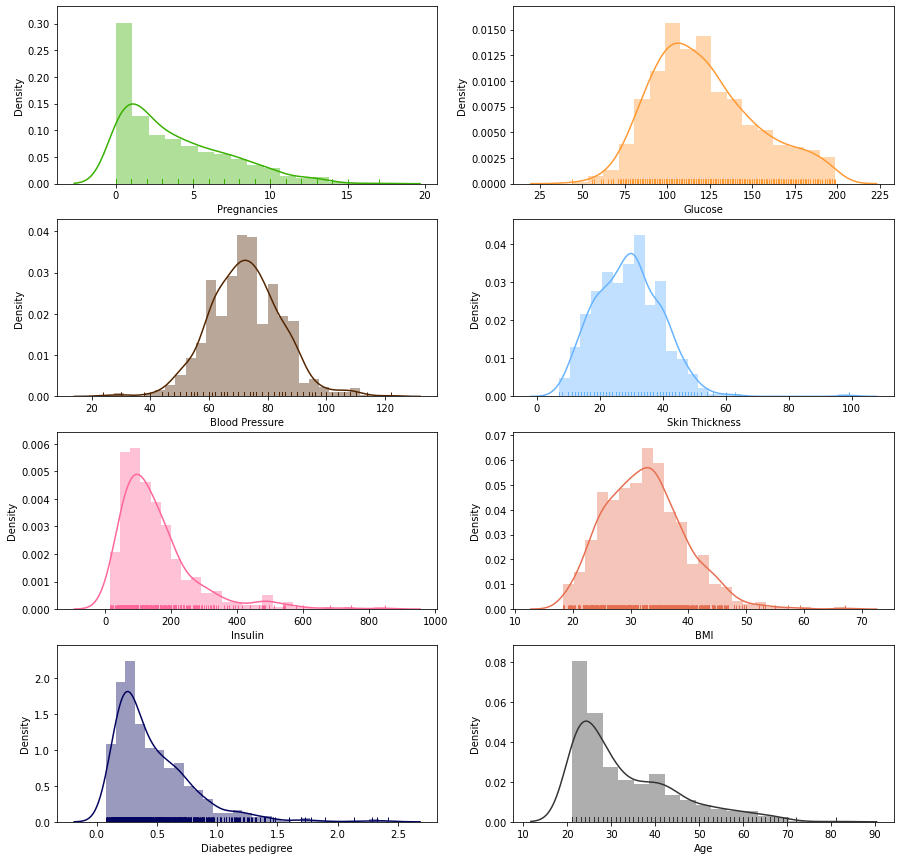

In [11]:
fig, axs = plt.subplots(4, 2, figsize=(15,15))
axs = axs.flatten()
sns.distplot(df['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df['Glucose'], rug=True,color='#FF9933',ax=axs[1])
sns.distplot(df['Blood Pressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(df['Skin Thickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(df['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(df['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(df['Diabetes pedigree'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(df['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

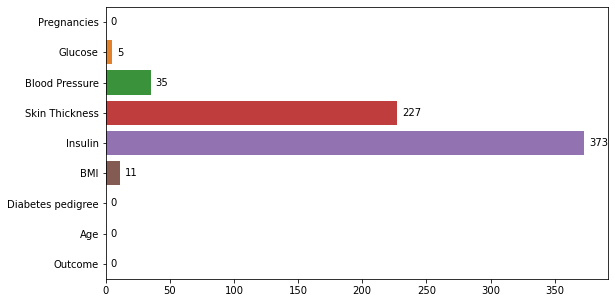

In [12]:
# Visualizing Null Values
plt.figure(figsize=(9,5))
ax = sns.barplot(x=df.isna().sum(),
                y=df.columns, orient='h')
for p in ax.patches:
    ax.annotate(text=f"{p.get_width():.0f}",
               xy=(p.get_width(), p.get_y()+p.get_height()/2),
               xytext=(5, 0), textcoords='offset points',
               ha="left", va="center")
plt.grid(False)
plt.show()

##### This dataset contains zeros and some invalid values i.e., values that are logically impossible like glucose, insulin, BMI, or blood pressure value of 0. It is possible to either drop and ignore such inconsistent values while cleaning the dataset or replacing them with a more appropriate range of values. Since there are many zeros in columns ‘Skin Thickness’ and ‘Insulin levels’; deleting those would result in a much smaller dataset. Hence, for this project, let us replace the NaN values with the mean so that the size of the dataset stays the same.

In [13]:
# imputing mean in null values
for col in zero_not_accepted:
    df[col].replace(np.nan, df[col].mean(), inplace = True)

##### Null values are replaced with mean

In [14]:
df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes pedigree,Age,Outcome
0,1.0,85.0,66.0,29.000000,155.548223,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,29.142593,155.548223,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,29.142593,155.548223,25.6,0.201,30.0,0.0


### Preprocessing the dataset

<Figure size 1440x1440 with 0 Axes>

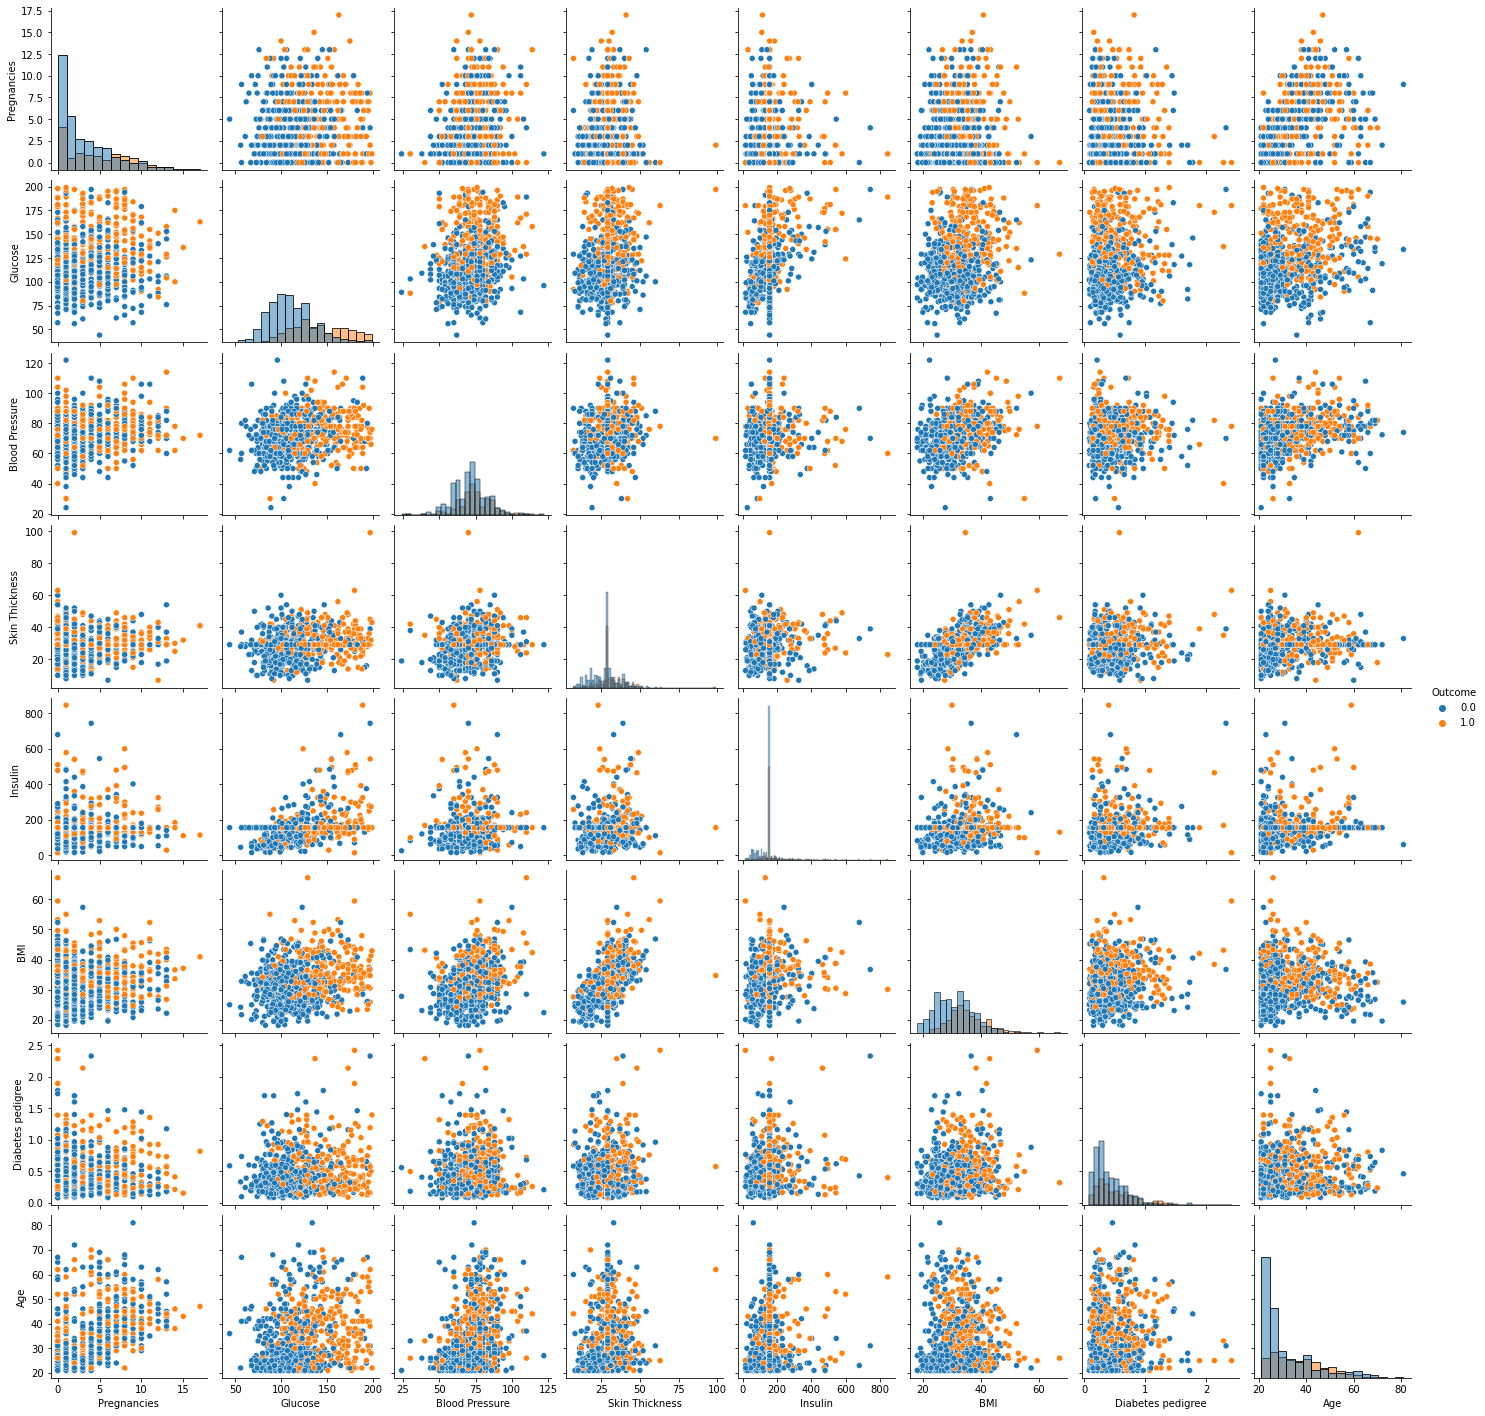

In [15]:
# Plotting pairwise relationship in a datset
plt.figure(figsize=(20,20))
sns.pairplot(data=df, hue="Outcome", diag_kind="hist")
plt.show()

##### With the seaborn pair plot, we can see that this dataset consists of a few outliers, especially in the BMI feature. Let’s see how many outliers we have and whether it is possible to delete them.

In [16]:
bmi_outliers=df[df['BMI']>40]
bmi_outliers['BMI'].shape

(96,)

##### Since the count of outliers is >10% of the total samples, we will not remove them. Rather let us replace the BMI outliers (BMI>40) with the mean value.

In [17]:
df["BMI"] = df["BMI"].apply(lambda x: df.BMI.mean() if x>40 else x)

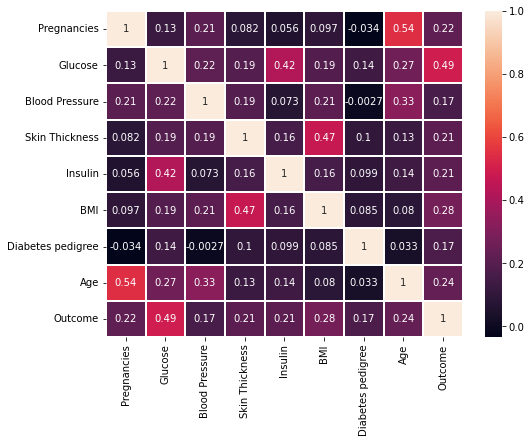

In [18]:
# Checking corelation between features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, linewidths=2)
plt.show()

#### Glucose(+ve), BMI(+ve), Age(+ve), Pregnancies(+ve), Diabetes pedigree, Insulin
##### Using a correlation matrix, we get a complete picture of the dependencies amongst the variables and their effect on the outcome. Here, we can see that the feature ‘glucose’ has a high correlation with the outcome which is expected. Other than that, none of the parameters seems to bear a very strong correlation to each other. 

In [19]:
#distribution of outcomes
df["Outcome"].value_counts()

0.0    500
1.0    267
Name: Outcome, dtype: int64

##### We see that 267 people are diabetic are 500 people are non-diabetic

In [20]:
diabetic = df[df['Outcome']==1]
diabetic.shape

(267, 9)

In [21]:
non_diabetic = df[df['Outcome']==0]
non_diabetic.shape

(500, 9)

##### We have created two different dataframes of diabetic and non-diabetic people.

In [22]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes pedigree,Age
Outcome,,,,,,,,
0.0,3.298000,110.709913,70.935418,27.765641,142.210761,29.939107,0.429734,31.190000
1.0,4.861423,142.143462,75.159145,31.721154,180.524744,32.735331,0.550213,37.018727


In [23]:
abc = df.groupby('Outcome').mean()
abc

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes pedigree,Age
Outcome,,,,,,,,
0.0,3.298000,110.709913,70.935418,27.765641,142.210761,29.939107,0.429734,31.190000
1.0,4.861423,142.143462,75.159145,31.721154,180.524744,32.735331,0.550213,37.018727


#### Let us visualize the variables vs outcome using bar graph

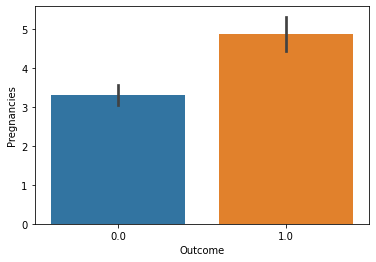

In [24]:
sns.barplot(y = 'Pregnancies',x='Outcome', data = df) #using bar plt for comparing variables with outcome
plt.show()

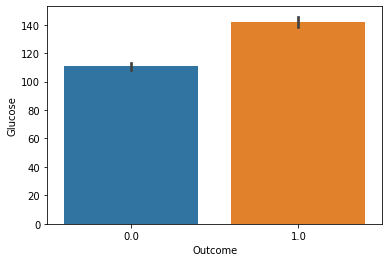

In [25]:
sns.barplot(y = 'Glucose',x='Outcome', data = df)
plt.show()

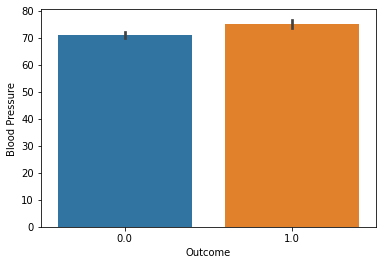

In [26]:
sns.barplot(y = 'Blood Pressure',x='Outcome', data = df)
plt.show()

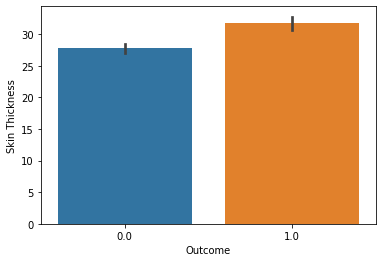

In [27]:
sns.barplot(y = 'Skin Thickness',x='Outcome', data = df)
plt.show()

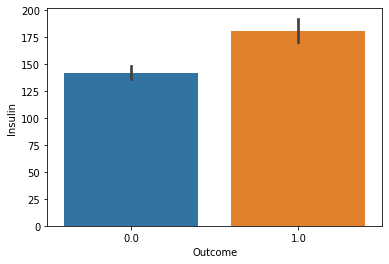

In [28]:
sns.barplot(y = 'Insulin',x='Outcome', data = df)
plt.show()

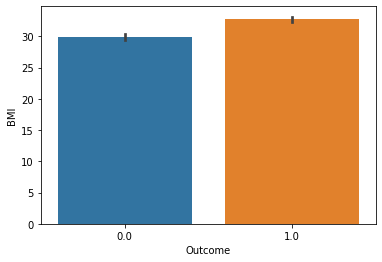

In [29]:
sns.barplot(y = 'BMI',x='Outcome', data = df)
plt.show()

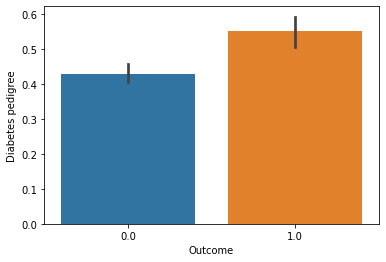

In [30]:
sns.barplot(y = 'Diabetes pedigree',x='Outcome', data = df)
plt.show()

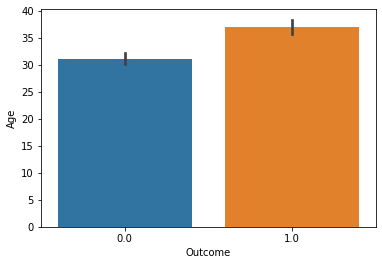

In [31]:
sns.barplot(y = 'Age',x='Outcome', data = df)
plt.show()

##### From above table and graph we can draw following conclusions:

##### 1. Pregnancies: Number of times pregnant is relatively less for Non-diabetic people.


##### 2. Glucose: Glucose level is relatively less for Non-diabetic people where as high for diabetic people.


##### 3. BMI: Diabetic people are Obese Class II(35-40) where as Non-diabetic people are Obese Class I(30-35) hence Diabetic people are extremely obese compared to Non-diabetic people.


##### 4. Diaetes Pedigree Function: Indicates the function which scores likelihood of diabetes based on family history from given dataseta about 35% entries with a likelihood of getting diabetes.


##### 5. Age: People with late 30's are more likely to have Diabetes.

## Performing essential feature engineering

In [32]:
X=df.iloc[:,0:8]
Y=df.iloc[:,8]

# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [33]:
X

array([[-0.84372629, -1.20482941, -0.52956011, ..., -0.89062864,
        -0.36426474, -0.18894038],
       [ 1.23423997,  2.01661929, -0.69489941, ..., -1.57215328,
         0.60470064, -0.1037951 ],
       [-0.84372629, -1.0733417 , -0.52956011, ..., -0.58084471,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  , -0.02144009, -0.03354219, ..., -0.97323769,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.14291954, -1.02557802, ..., -0.16779947,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.941854  , -0.1988815 , ..., -0.10584268,
        -0.47293375, -0.87010264]])

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
fit=pca.fit(X)

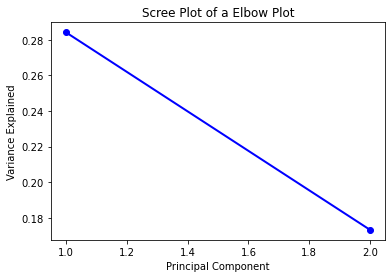

In [35]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot of a Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

kink is '2' Princial Component

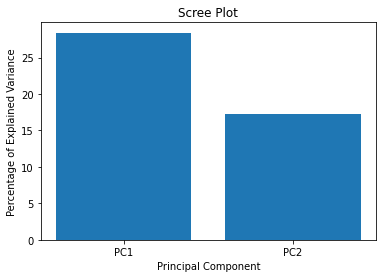

In [36]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [37]:
pca.n_components_

2

In [38]:
pca.explained_variance_ratio_

array([0.28421053, 0.17316657])

In [39]:
#Transforming x_train
x_data = pca.transform(X)
x_data

array([[-1.44624588e+00,  1.41511069e-03],
       [ 4.69060834e-01, -5.67859551e-01],
       [-2.19499701e+00, -6.72145239e-02],
       ...,
       [-8.78620423e-01, -1.00633417e+00],
       [-2.20608989e-01, -8.49823538e-02],
       [-1.14949522e+00,  6.47815259e-01]])

In [40]:
import statsmodels.api as sm
sm.add_constant(x_data)

array([[ 1.00000000e+00, -1.44624588e+00,  1.41511069e-03],
       [ 1.00000000e+00,  4.69060834e-01, -5.67859551e-01],
       [ 1.00000000e+00, -2.19499701e+00, -6.72145239e-02],
       ...,
       [ 1.00000000e+00, -8.78620423e-01, -1.00633417e+00],
       [ 1.00000000e+00, -2.20608989e-01, -8.49823538e-02],
       [ 1.00000000e+00, -1.14949522e+00,  6.47815259e-01]])

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)
yp= lda.predict(X)
yp

array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0.

##### Above is the data which will be used for feeding to the machine learning algorithm.

# Conclusion

##### From analysis and graphs above, It is clear that "Number of times pregnant" and "Glucose" are the major factors contributing for the diabeties 
##### "The diabeties pedigree function" which scores likelihood of diabetes based on family history from given dataseta about only 35% entries with a likelihood of getting diabetes.
###### From the above analysis we get to know that diabeties is not depending on "Insulin level-(Insulin is a hormone that lowers the level of glucose (a type of sugar) in the blood)"  hence diabetic people may have either type 2 diabetes or Gestational diabetes.

##### From the analysis we also know that Diabetic people are Obese Class II(35-40) where as Non-diabetic people are Obese Class I(30-35) hence Diabetic people are extremely obese compared to Non-diabetic people.
#### Overweight women are more likely to have "Type 2 diabetes" and Overweight women are more likely to have "Gestational diabetes". It’s also more common in women who have had gestational diabetes before. And it’s more common in women who have a family member with Type 2 diabetes. Women with twins or other multiples are also more likely to have it.

##### From the above analysis Age factor does not have must role in causing diabeties and there is no much of the differences between them. 
